In [1]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

In [2]:
df=pd.read_csv("House_Price_Dataset_R2_08.csv") # Importing dataset
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1887.442085,5,4,3,1970,Downtown,Excellent,No,149919
1,2,2395.796960,5,4,3,1958,Downtown,Excellent,No,424998
2,3,2263.289868,2,2,3,1938,Downtown,Good,No,266746
3,4,2534.182145,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,2934.628454,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,2502.629140,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,2863.315382,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,2254.588496,5,1,2,1903,Rural,Poor,No,476925
1998,1999,1667.096882,3,1,2,1936,Urban,Excellent,Yes,161119


In [3]:
df.isnull().sum()   # Check for missing values in each column

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [4]:
# Select input features (independent variables) and target (dependent variable)
x = df[["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Condition", "Garage", "Location"]]
y = df["Price"]

In [7]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

x["Condition"] = le1.fit_transform(x["Condition"])
x["Garage"] = le2.fit_transform(x["Garage"])
x["Location"] = le3.fit_transform(x["Location"])

In [8]:
# Import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [9]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2) # # Split dataset: 80% for training and 20% for testing

In [10]:
len(train_x) # Number of training samples

1600

In [11]:
len(test_x) # Number of testing samples

400

In [12]:
# Import LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression
model=LinearRegression()# Create instance of the LinearRegression model

In [13]:
model.fit(train_x,train_y) #Train the model using the training data

LinearRegression()

In [14]:
model.score(test_x,test_y) # Evaluate model performance on the test set

0.8160776444755871

In [15]:
predict_y=model.predict(test_x) # Predict house prices for the test set

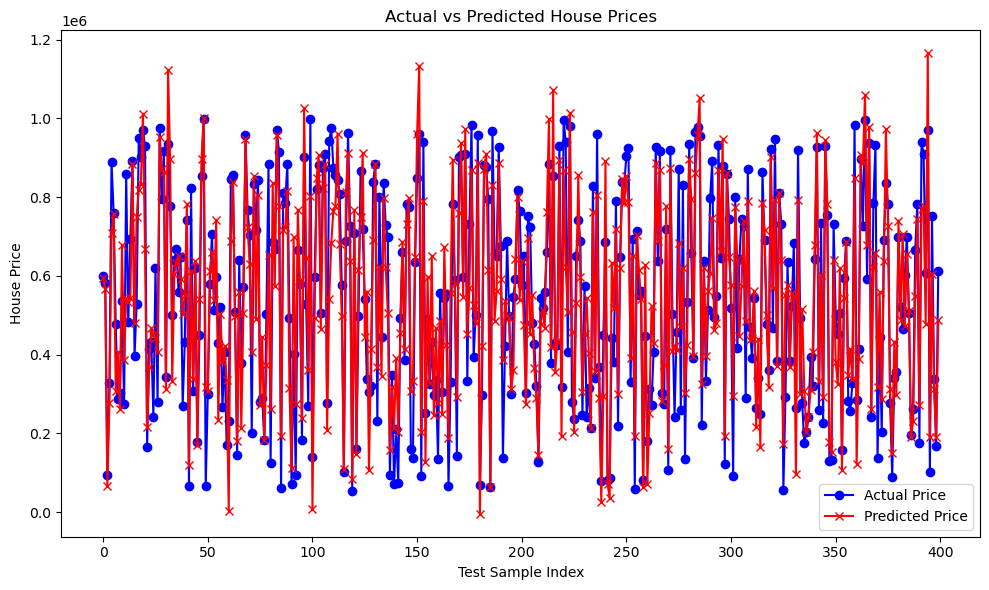

In [18]:
import matplotlib.pyplot as plt
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_y)), test_y.values, label="Actual Price", color="blue", marker='o')
plt.plot(range(len(test_y)), predict_y, label="Predicted Price", color="red", marker='x')
plt.xlabel("Test Sample Index")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# Take user input for prediction
print("\nEnter the following details to predict house price:")

area = float(input("Area (in sq. ft): "))
bedrooms = int(input("Number of Bedrooms: "))
bathrooms = int(input("Number of Bathrooms: "))
floors = int(input("Number of Floors: "))
year_built = int(input("Year Built: "))
condition = input("Condition (e.g., Excellent, Good, Fair, Poor): ")
garage = input("Garage (Yes or No): ")
location = input("Location (e.g., Urban, Suburban, Downtown,Rural): ")

# Handle unseen categories
if condition not in le1.classes_:
    print(f"Invalid Condition: '{condition}' not in training data. Available: {list(le1.classes_)}")
    exit()
if garage not in le2.classes_:
    print(f"Invalid Garage value: '{garage}' not in training data. Available: {list(le2.classes_)}")
    exit()
if location not in le3.classes_:
    print(f"Invalid Location: '{location}' not in training data. Available: {list(le3.classes_)}")
    exit()

condition_encoded = le1.transform([condition])[0]
garage_encoded = le2.transform([garage])[0]
location_encoded = le3.transform([location])[0]

# Create input and predict
input_data = [[area, bedrooms, bathrooms, floors, year_built, condition_encoded, garage_encoded, location_encoded]]
predicted_price = model.predict(input_data)[0]

print(f"\nPredicted House Price: ₹{predicted_price:,.2f}")


Enter the following details to predict house price:


Area (in sq. ft):  2045
Number of Bedrooms:  3
Number of Bathrooms:  3
Number of Floors:  2
Year Built:  2017
Condition (e.g., Excellent, Good, Fair, Poor):  Excellent
Garage (Yes or No):  Yes
Location (e.g., Urban, Suburban, Downtown,Rural):  Urban



Predicted House Price: ₹320,977.29
